<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2  (Problem 2) - Character Generator Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import re
import string
import random
import sys
import matplotlib.pyplot as plt


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [2]:
#Opening and reading the text file
path = "Harry_Potter_Book1.txt"
text = open(path, encoding="utf8").read().lower()

In [3]:
#Checking the total number of characters in the original text 
print('Corpus length:', len(text))
print(type(text))


Corpus length: 474429
<class 'str'>


### 1.2 Data Processing


In [4]:
# Removing unnecessary characters

def clean_text(text):
    
    bad_chars = ['•', '■', '—']
    text=re.sub("</?.*!>"," <> ",text)
    
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = "".join(i for i in text if not i.isdigit())
    text = "".join(i for i in text if not i in bad_chars)

    return text

text = clean_text(text)
print(text)

 




the boy who lived 

mr and mrs dursley of number four privet drive 
were proud to say that they were perfectly normal 
thank you very much they were the last people you’d 
expect to be involved in anything strange or 
mysterious because they just didn’t hold with such 
nonsense 

mr dursley was the director of a firm called 
grunnings which made drills he was a big beefy 
man with hardly any neck although he did have a 
very large mustache mrs dursley was thin and 
blonde and had nearly twice the usual amount of 
neck which came in very useful as she spent so 
much of her time craning over garden fences spying 
on the neighbors the dursley s had a small son 
called dudley and in their opinion there was no finer 
boy anywhere 

the dursleys had everything they wanted but they 
also had a secret and their greatest fear was that 
somebody would discover it they didn’t think they 
could bear it if anyone found out about the potters 
mrs potter was mrs dursley’s sister but they hadn’t

In [5]:
## Tokenize text. Allows us to remove stopwords and lemmatize text
## This allows model to learn more efficiently

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens


In [6]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wn = nltk.WordNetLemmatizer()
def lemmatizing(text):
    text = [wn.lemmatize(word) for word in text]
    return text

print(text)

 




the boy who lived 

mr and mrs dursley of number four privet drive 
were proud to say that they were perfectly normal 
thank you very much they were the last people you’d 
expect to be involved in anything strange or 
mysterious because they just didn’t hold with such 
nonsense 

mr dursley was the director of a firm called 
grunnings which made drills he was a big beefy 
man with hardly any neck although he did have a 
very large mustache mrs dursley was thin and 
blonde and had nearly twice the usual amount of 
neck which came in very useful as she spent so 
much of her time craning over garden fences spying 
on the neighbors the dursley s had a small son 
called dudley and in their opinion there was no finer 
boy anywhere 

the dursleys had everything they wanted but they 
also had a secret and their greatest fear was that 
somebody would discover it they didn’t think they 
could bear it if anyone found out about the potters 
mrs potter was mrs dursley’s sister but they hadn’t

[nltk_data] Downloading package wordnet to C:\Users\Cheng
[nltk_data]     Jhang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Cheng
[nltk_data]     Jhang\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences)) 
print('sentences[0]: ',sentences[0])
print('next_chars[0]: ',next_chars[0])
print('\n')
print('sentences[1]: ',sentences[1])
print('next_chars[1]: ',next_chars[1])

Number of sequences: 152473
sentences[0]:   




the boy who lived 

mr and mrs dursley of number four 
next_chars[0]:  p


sentences[1]:  


the boy who lived 

mr and mrs dursley of number four pri
next_chars[1]:  v


In [8]:
#Identify a list of unique characters and punctuations in the clean text
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
print(chars)

# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 32
['\n', ' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”']


In [9]:
#Perform one-hot encoding on X & y and convert them into binary arrays 
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
print('len(x): ',len(x))
print('x[0]: ',x[0])
print('len(y): ',len(y))
print('y[0]: ',y[0])

Vectorization...
len(x):  152473
x[0]:  [[False  True False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False  True False ... False False False]]
len(y):  152473
y[0]:  [False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False]


In [10]:
x.shape

(152473, 60, 32)

## Step 2 – Develop Character Generator Model

In [11]:
#building the network
model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

In [12]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])


In [13]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [14]:
history = model.fit(x,y,
                   batch_size=128,
                   epochs=100,
                   validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.35, 0.65, 1.2, 1.35]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
953/953 [==============================] - 49s 50ms/step - loss: 1.9466 - acc: 0.4292 - val_loss: 1.6483 - val_acc: 0.5083
Epoch 2/100
953/953 [==============================] - 47s 49ms/step - loss: 1.5380 - acc: 0.5336 - val_loss: 1.5383 - val_acc: 0.5353
Epoch 3/100
953/953 [==============================] - 46s 49ms/step - loss: 1.4188 - acc: 0.5650 - val_loss: 1.4706 - val_acc: 0.5582
Epoch 4/100
953/953 [==============================] - 47s 49ms/step - loss: 1.3599 - acc: 0.5823 - val_loss: 1.4717 - val_acc: 0.5605
Epoch 5/100
953/953 [==============================] - 49s 52ms/step - loss: 1.3348 - acc: 0.5909 - val_loss: 1.4516 - val_acc: 0.5653
Epoch 6/100
953/953 [==============================] - 47s 49ms/step - loss: 1.6827 - acc: 0.5670 - val_loss: 1.4503 - val_acc: 0.5639
Epoch 7/100
953/953 [==============================] - 45s 47ms/step - loss: 1.2981 - acc: 0.5983 - val_loss: 1.4377 - val_acc: 0.5681
Epoch 8/100
953/953 [==============================] - 

C:\Users\Cheng Jhang\AppData\Local\Temp\ipykernel_14124\291334795.py:3: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


ea
m oseo 
   ne e a 
ioude ge we sem neet 

te 
 wo s o lo e sins oeo iien e nes n  oo ao 


ioit 
 a te  sae   o an  era  ge 
  
 e ore ge
  s   ses o so o so s  oh so  nd e  

 al id an 

oit  an aowe t s ow  o d  
  ea   

o t  h s o 

ooe s  anooe w 
 eeese 
eoi go   
oow 
iimoino hsingh
 o 

 g oo 

e 

oe 
oo i  ohe h 
s 
 e ugaen  w a  wcao
o“ 
 noo 
ee 
 h  
o e 
e 
o 
 
 his oo t
------ temperature: 0.65
ytherin 
ghost” 

harry looked over at the slytherin table aeinir ti hs aeisinitses
iherstg p s giano hase 
o o ichhei t aaphineoni wawlw prd ii iisoinonso ioa  ang aer we bo  oarirooon wo  or ohao
eww  s mel h
ek asse se gg poo oungos
owethi hoaoto soedihhey an oroleutadnteo dev ao 
 
 wess in  p 
t t ide  iiora 

twtg twws harbg an hhe n stlsse

wi
lehhh ha” pehgo a  aa 

 ateo w n hhsheph ln
 ipgege 

i h oe ilaahh e hoareono oa
edai  eash aho ho 
e 
pa
------ temperature: 1.2
ytherin 
ghost” 

harry looked over at the slytherin table ahkgcoetode si t sl ”tnut aghud i
ewwh

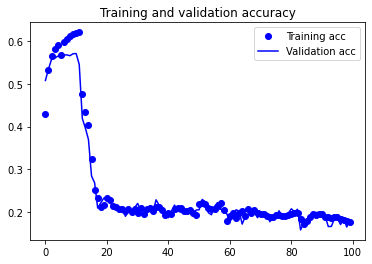

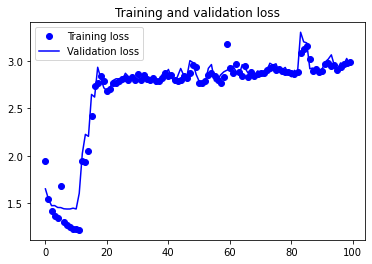

In [15]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Changing to GRU & using adam optimizer

In [37]:
#building the network
model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [38]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [39]:
history = model.fit(x,y,
                   batch_size=128,
                   epochs=100,
                   validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.35, 0.65, 1.2, 1.35]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
953/953 [==============================] - 43s 44ms/step - loss: 2.3374 - acc: 0.3299 - val_loss: 2.0828 - val_acc: 0.4002
Epoch 2/100
953/953 [==============================] - 39s 41ms/step - loss: 1.9561 - acc: 0.4341 - val_loss: 1.8660 - val_acc: 0.4642
Epoch 3/100
953/953 [==============================] - 39s 41ms/step - loss: 1.7787 - acc: 0.4808 - val_loss: 1.7476 - val_acc: 0.4946
Epoch 4/100
953/953 [==============================] - 39s 41ms/step - loss: 1.6632 - acc: 0.5100 - val_loss: 1.6597 - val_acc: 0.5165
Epoch 5/100
953/953 [==============================] - 39s 41ms/step - loss: 1.5795 - acc: 0.5318 - val_loss: 1.6100 - val_acc: 0.5253
Epoch 6/100
953/953 [==============================] - 39s 41ms/step - loss: 1.5163 - acc: 0.5470 - val_loss: 1.5722 - val_acc: 0.5391
Epoch 7/100
953/953 [==============================] - 39s 41ms/step - loss: 1.4673 - acc: 0.5591 - val_loss: 1.5372 - val_acc: 0.5464
Epoch 8/100
953/953 [==============================] - 

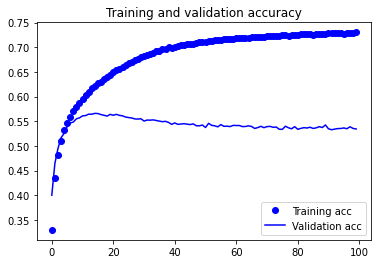

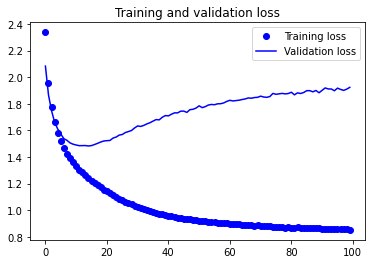

In [42]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#adding dropouts

In [16]:
#building the network
model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [18]:
history = model.fit(x,y,
                   batch_size=128,
                   epochs=100,
                   validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.35, 0.65, 1.2, 1.35]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
953/953 [==============================] - 37s 38ms/step - loss: 2.4797 - acc: 0.2966 - val_loss: 2.1769 - val_acc: 0.3692
Epoch 2/100
953/953 [==============================] - 37s 39ms/step - loss: 2.1744 - acc: 0.3723 - val_loss: 2.0119 - val_acc: 0.4160
Epoch 3/100
953/953 [==============================] - 38s 40ms/step - loss: 2.0546 - acc: 0.4046 - val_loss: 1.9117 - val_acc: 0.4371
Epoch 4/100
953/953 [==============================] - 38s 39ms/step - loss: 1.9631 - acc: 0.4291 - val_loss: 1.8211 - val_acc: 0.4699
Epoch 5/100
953/953 [==============================] - 38s 39ms/step - loss: 1.8993 - acc: 0.4453 - val_loss: 1.7656 - val_acc: 0.4774
Epoch 6/100
953/953 [==============================] - 38s 40ms/step - loss: 1.8540 - acc: 0.4557 - val_loss: 1.7293 - val_acc: 0.4876
Epoch 7/100
953/953 [==============================] - 38s 40ms/step - loss: 1.8221 - acc: 0.4636 - val_loss: 1.6999 - val_acc: 0.4964
Epoch 8/100
953/953 [==============================] - 

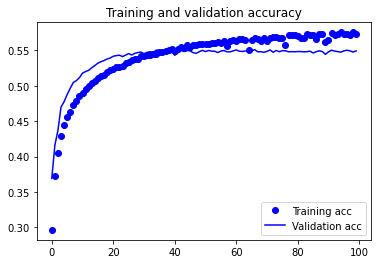

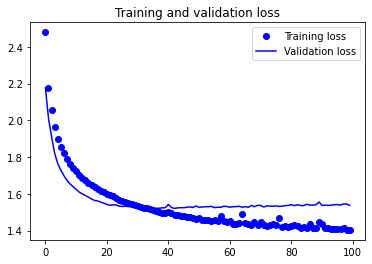

In [19]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#removed l2 regularizer, adjusted temperatures

In [11]:
#building the network
model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [12]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [13]:
history = model.fit(x,y,
                   batch_size=128,
                   epochs=100,
                   validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.25, 0.5, 1.1, 1.25]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
953/953 [==============================] - 42s 43ms/step - loss: 2.4701 - acc: 0.2991 - val_loss: 2.1748 - val_acc: 0.3674
Epoch 2/100
953/953 [==============================] - 40s 42ms/step - loss: 2.1729 - acc: 0.3739 - val_loss: 2.0106 - val_acc: 0.4178
Epoch 3/100
953/953 [==============================] - 40s 41ms/step - loss: 2.0575 - acc: 0.4061 - val_loss: 1.8986 - val_acc: 0.4447
Epoch 4/100
953/953 [==============================] - 38s 40ms/step - loss: 1.9660 - acc: 0.4281 - val_loss: 1.8218 - val_acc: 0.4662
Epoch 5/100
953/953 [==============================] - 38s 40ms/step - loss: 1.9041 - acc: 0.4434 - val_loss: 1.7695 - val_acc: 0.4800
Epoch 6/100
953/953 [==============================] - 40s 42ms/step - loss: 1.8565 - acc: 0.4563 - val_loss: 1.7311 - val_acc: 0.4892
Epoch 7/100
953/953 [==============================] - 39s 41ms/step - loss: 1.8184 - acc: 0.4671 - val_loss: 1.7018 - val_acc: 0.4986
Epoch 8/100
953/953 [==============================] - 

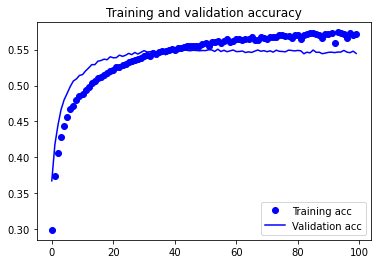

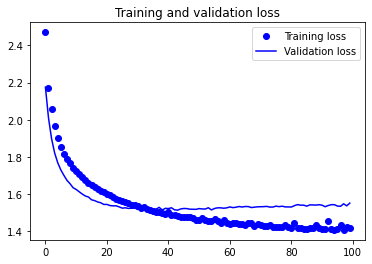

In [14]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model.save('text_model_cj.h5')

## Step 3 – Use the developed Model to generate the characters / sentences

In [31]:
model = keras.models.load_model('text_model_cj.h5')

In [32]:
# takes the user input
text_input = (input(''))

i like appl


In [33]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [34]:
# Select a text seed at random
for temperature in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2]:
    generated_text = text_input
    print('------ temperature:', temperature)
    sys.stdout.write(text_input)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

------ temperature: 0.2
i like appl aaaea ioieaaa eiieeaaiiarisaaieiiieeaaiiaaaaaaealieaiaieei  iaaiiaaeaeeeieaaeeeaaaeiiaaeaeaiaai e oeeaiei  ieaaieaaiiiaieiiiaaaa iai eaeeiai iiaaeaiieiaeaa aeaiaeaaieiaeeaaiaaaa eiiaaiaaae aeeiaieia   eiaieiaaaaeaaieaa eaae eaaiiaaaeoaaiieeiea aaaii aaei aiieeaaaaiaa aaeeeaeiaeeieiaa  i eaeiaeeaai iae a aeaaa eeaaoaoeisoaiaiaieea aaieeeaiieaiiieaaiieaeeeaaaea aeieiiaeaeaiiiiea aia aaeeeaaiiaaaaee
------ temperature: 0.3
i like applsiaiaelse eaaiesaiiaeaiaaeaioaoaeeiaess  aaa arl eaaiaiaaaaoeilasiae ee eeaaaeaaoaa aiiaitaeoeoia  seaeiiiieereaeieaaaais eisiiioieaeeiiiimaiai  ielasaalei e sa  e aemeasaeiaaiaeioaeaaeie aai eaeiaeeai a eaioieelaeiaarhiia iieeaseeiaaeae aiaoaiieae aaa   aaiia  ia eeaieaea eae  oaaeiiaai isiaaelo o aliaiaeai eae asiwer  ir iai aiielaiaaeaae aeaiioaaoeaea eseeea eieai aeii iileaaiaeooai aaiasiieeai
------ temperature: 0.4
i like appl aeaaya eoae iia  eyae eiefiasaiiioeeoiahaeaisierseeaia a ioeeieearoiroanioibiirlal iiae atei